# Product analytics
Product analytics starts by tracking events. These events can be customer
website visits, page views, browser histories, purchases, or any other
actions that customers can take with the products that you offer. Then, you can
start analyzing and visualizing any observable patterns in these events with
the goal of creating actionable insights or reports. Some of the common goals
with product analytics are as follows:
    
### Improve customer and product retention: 
By analyzing what customers viewed and purchased, you can identify what items customers
repeatedly purchase and who those repeat customers are. On the other
hand, you can also identify what items customers do not buy and the
customers who are at risk of churning. Analyzing and understanding the
common attributes of the repeatedly purchased items and repeat
customers can help you improve your retention strategy.
### Identify popular and trending products: 
As a marketer for retail businesses, it is important to have a good understanding of popular and
trending products. These best-selling products are key revenue drivers
for the business and provide new selling opportunities, such as crosssells or bundle sales. With product analytics, you should be able to
identify and track these popular and trending products easily and
generate new strategies to explore different opportunities using these
best-selling products.
### Segment customers and products based on their key attributes: 
With the customer profile and product data, you can segment your customer
base and products based on their attributes using product analytics.
Some of the ways to segment your product data are based on their
profitability, volumes of sales, volumes of reorders, and numbers of
refunds. With these segmentations, you can draw actionable insights on
which product or customer segments to target next.
### Develop marketing strategies with higher ROI: 
Product analytics can also be used to analyze the return on investment (ROI) of your
marketing strategies. By analyzing the marketing dollars spent on
promoting certain items and the revenue generated from those products,
you can understand what works and what does not. Using product
analytics for marketing ROI analyses can help you create more efficient
marketing strategies.


In [1]:
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [3]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Product Analytics

Before we move on to the next step, there is one data-cleaning step we need to
take. Let's look quickly at the distribution of the Quantity column. We will
visualize the distributions of Quantity by using the following code:

#### - Quantity Distribution Visualization

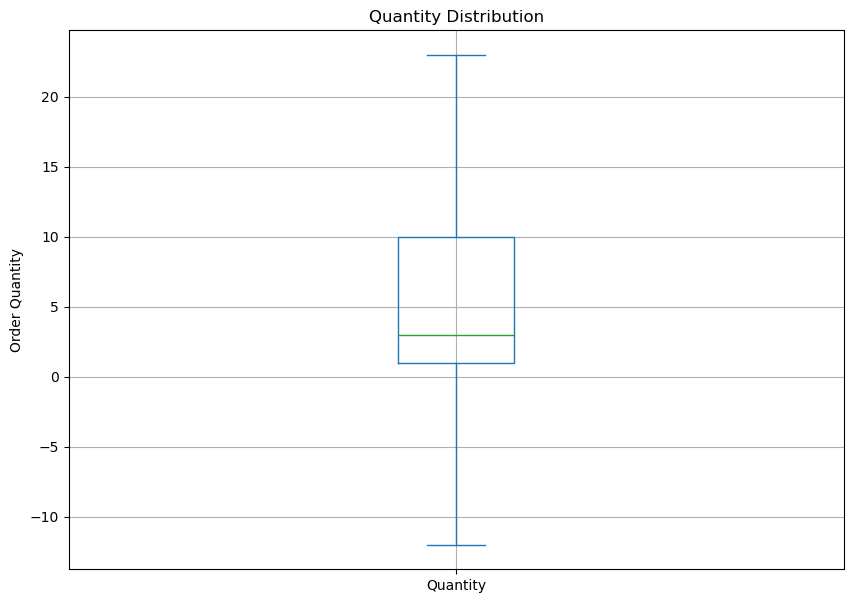

In [5]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

As you can see from this plot, some orders have negative quantities. This is
because the cancelled or refunded orders are recorded with negative values in
the Quantity column of our dataset. For illustration purposes in this exercise,
we are going to disregard the cancelled orders. We can filter out all the
cancelled orders in our DataFrame by using the following code:


In [6]:
df = df.loc[df['Quantity'] > 0]
#Now, we are ready to conduct further analyses and dive into our data.

In [7]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [8]:
df.shape

(531285, 8)

In [9]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,531285.000000
mean,10.655262
std,156.830323
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [11]:
df = df.loc[df['Quantity'] > 0]

# Time series trends

Before we look at product-level data, as a marketer for an e-commerce
business, it will be beneficial to have a better understanding of the overall
time series trends in the revenue and the numbers of orders or purchases. This
will help us understand whether the business is growing or shrinking in terms
of both the overall revenue and the numbers of orders we receive over time.
First, we are going to look into the numbers of orders received over time.
Take a look at the following code:


In [12]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

As you can see from this code, we are using the resample and nunique functions
that we have not used in the previous chapters. The resample function resamples
and converts time series data into the frequency we desire. In our example,
we are resampling our time series data into monthly time series data, by using
'M' as our target frequency and counting the number of distinct or unique
invoice numbers. This way, we can get the number of unique purchases or
orders month-on-month. The resulting DataFrame looks like the following
screenshot:

In [13]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

Often, time series data is better visualized using line charts. Let's take a look
at the following code to see how we can visualize this monthly data in a line
chart:


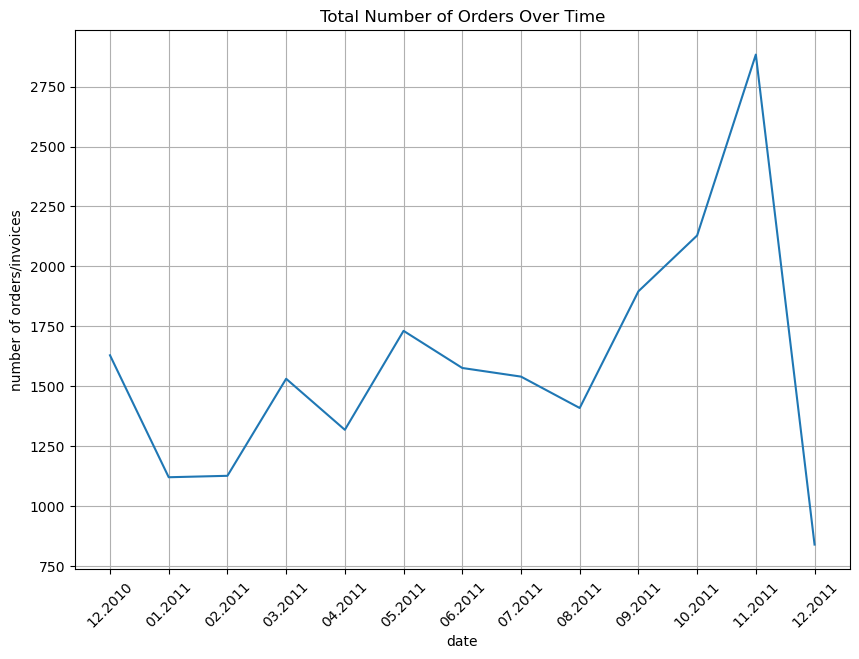

In [14]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

As you can see from this code, we are using the plot function of a pandas
DataFrame. Using the xticks function of the matplotlib package, we can customize
the labels of the x-ticks. Let's take a look at the following plot first

As you may notice from this plot, the tick labels in the x axis are formatted by
month and year. If you look back at the previous code, we formatted them
using x.strftime('%m.%Y'), where x is the Python date object, %m is the placeholder
for the month value, and %Y is the placeholder for the year value. The strftime
function of the Python date object formats the date into the given format.
One thing that is noticeable from this chart is that there is a sudden radical
drop in the number of orders in December 2011. If you look closely at the
data, this is simply because we do not have the data for the full month of
December 2011. We can verify this by using the following code:

In [15]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In this code, we get a series of all invoice dates from December 1, 2011.
Then, we print out the minimum and maximum dates. When you run this code,
you will get the following output:

In [16]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [17]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

In [27]:
df.shape

(531285, 8)

As you can see from this output, we only have the data from December 1, to
December 9, 2011. It would be a misrepresentation if we use this data for
analyzing December sales and revenue. For further analyses, we will
disregard any data from December 1, 2011. You can use the following code to
remove those data points:


In [18]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

Now that we have filtered out incomplete data for December 2011, we can
redraw the line chart using the previous codes. After removing those data
points from December 2011, the line chart looks like the following:

In [19]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [20]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

Now that we have filtered out incomplete data for December 2011, we can
redraw the line chart using the previous codes. After removing those data
points from December 2011, the line chart looks like the following:

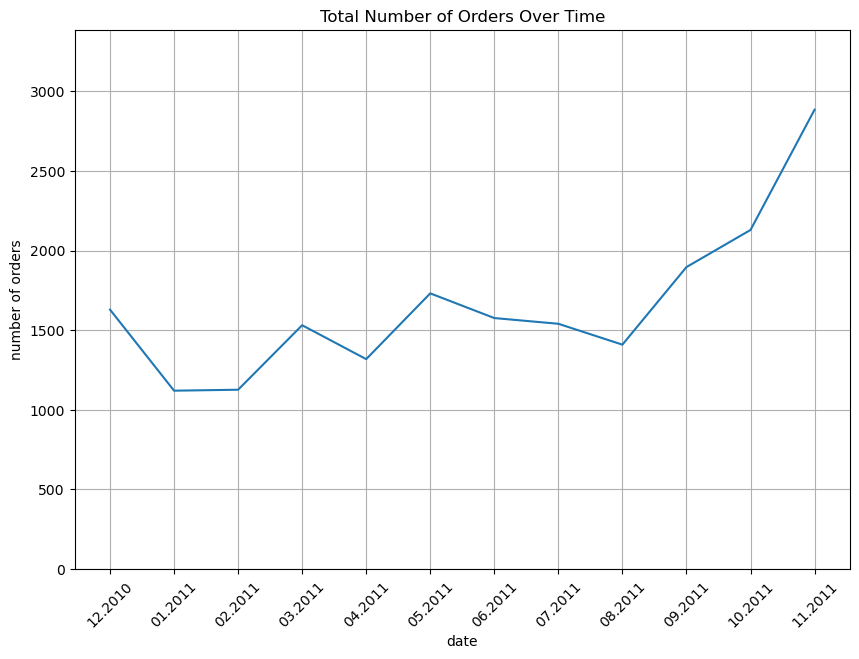

In [21]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values)+500])

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

Let's take a quick look at the monthly revenue data by looking at the following
code:


#### - Time-series Revenue

In [22]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [23]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

As you can see from this code, the first thing we do here is to calculate the
aggregate sales amount from each order, which is simply the UnitPrice
multiplied by the Quantity. Once we have computed and created this Sales
column, we can use the resample function with an 'M' flag to resample and
convert our time series data into monthly data. Then, using sum as the aggregate
function, we can get the monthly sales revenue data. The resulting data looks
like the following:

In [24]:
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

We can visualize this data into a line plot, using the following code:

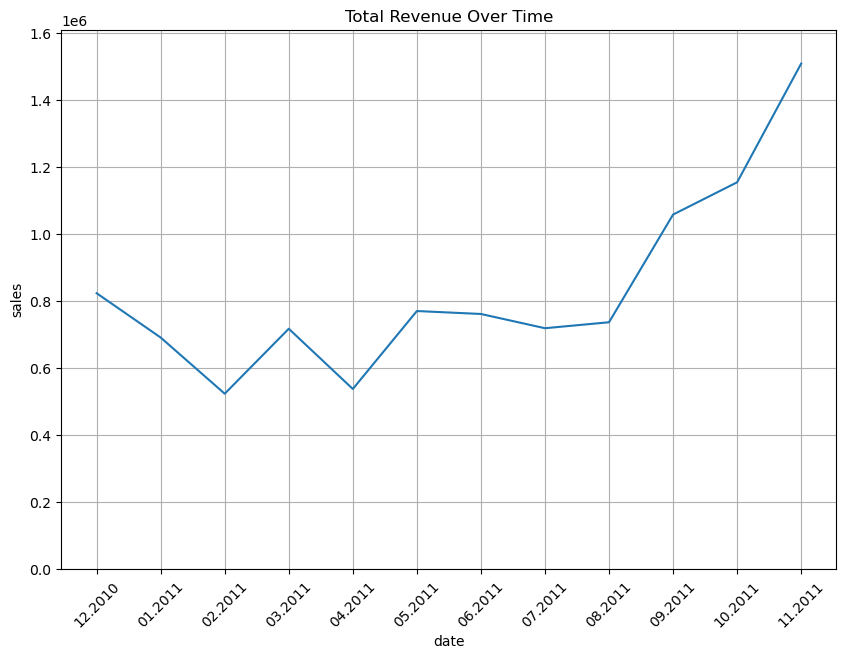

In [25]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=45
)

plt.show()

# Time Series Repeat Cutomers

Another important factor of a successful business is how well it is retaining
customers and how many repeat purchases and customers it has. In this
section, we are going to analyze the number of monthly repeat purchases and
how much of the monthly revenue is attributable to these repeat purchases and
customers.

In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


As you might have noticed from this snapshot of the data, there are multiple
records for one purchase order (InvoiceNo). However, what we need is the
aggregate data for each order, so that one record in the DataFrame represents one
purchase order. We can aggregate this raw data for each InvoiceNo by using the
following code:

In [27]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

As you can see from this code, we are grouping the DataFrame, df, by InvoiceNo
and InvoiceDate and summing up all the Sales. This way, our new DataFrame,
invoice_customer_df, has one record for each purchase order. The resulting
DataFrame looks like the following:

In [28]:
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


As you can see here, each record in the DataFrame now has all the information
we need for each order. Now, we need to aggregate this data per month and
compute the number of customers who made more than one purchase in a
given month. Take a look at the following code:


In [29]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

Let's take a closer look at the groupby function in this code. Here, we group by
two conditions—pd.Grouper(freq='M') and CustomerID. The first groupby
condition, pd.Grouper(freq='M'), groups the data by the index, InvoiceDate, into
each month. Then, we group this data by each CustomerID. Using the filter
function, we can subselect the data by a custom rule. Here, the filtering
rule, lambda x: len(x) > 1, means we want to retrieve those with more than one
record in the group. In other words, we want to retrieve only those customers
with more than one order in a given month. Lastly, we resample and aggregate
by each month and count the number of unique customers in each month by
using resample('M') and nunique.
The resulting data looks like the following:


In [30]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

Let's now compare these numbers against the total number of monthly
customers. You can use the following code to compute the total number of
monthly customers:

In [32]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

And the resulting data looks like the following:


In [33]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

If you compare these two sets of numbers, roughly about 20% to 30% of the
customers are repeat customers. You can use the following code to calculate
the percentages of repeat customers for each month:

In [34]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

Let's visualize all of this data in one chart:

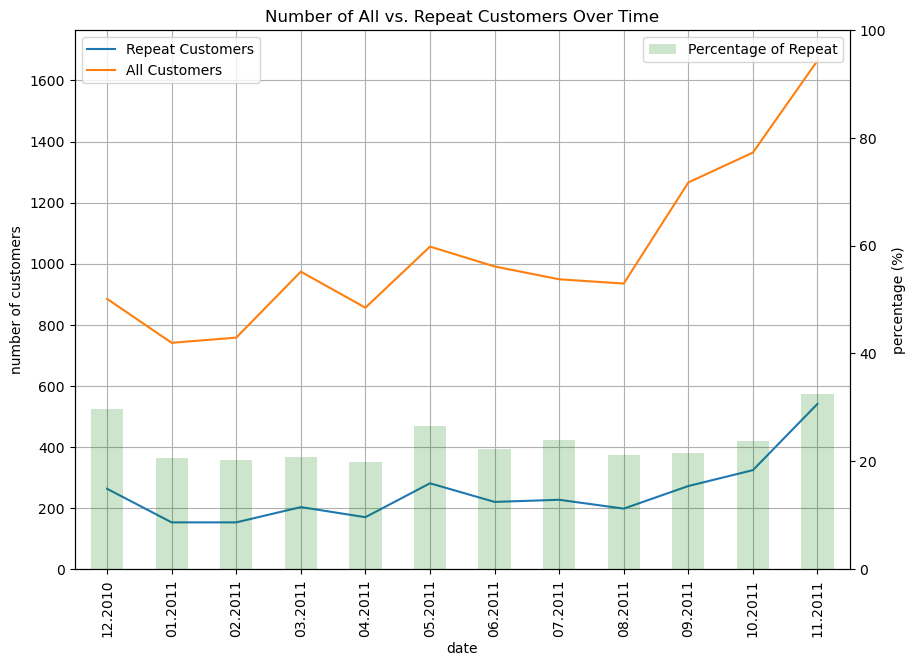

In [35]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], 
    rotation=45
)

plt.show()

#### - Revenue from Repeat Customers

In [36]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

In [37]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

In [38]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

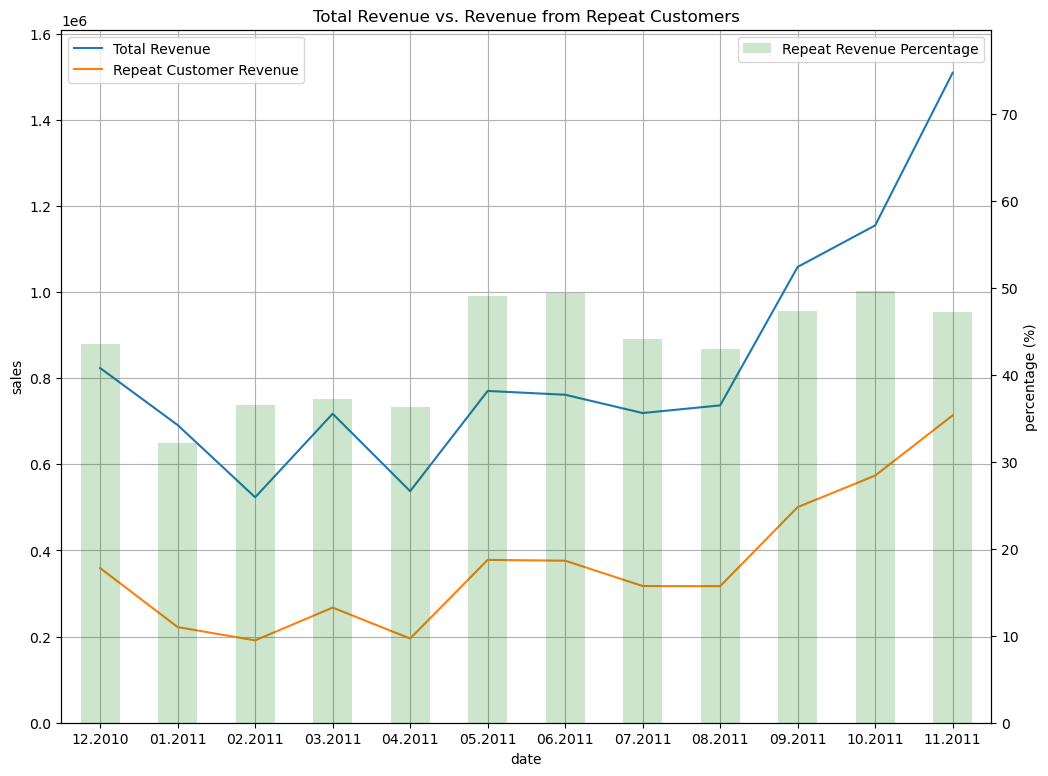

In [39]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

We see a similar pattern as before, where there is a significant increase in the
revenue from September 2011. One interesting thing to notice here is the
percentage of the monthly revenue from repeat customers. We have seen that
roughly 20-30% of the customers who made purchases are repeat customers.
However, in this graph, we can see that roughly 40-50% of the Total
Revenue is from repeat customers. In other words, roughly half of the revenue
was driven by the 20-30% of the customer base who are repeat customers.
This shows how important it is to retain existing customers.

#### - Popular Items Over Time

So far, we have analyzed the overall time series patterns and how customers
engage with the overall business, but not how customers engage with
individual products. In this section, we are going to explore and analyze how
customers interact with individual products that are sold. More specifically,
we will take a look at the trends of the top five best-sellers over time.
For time series trending-item analysis, let's count the number of items sold for
each product for each period. Take a look at the following code:

In [40]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

With this data in data_item_df, let's see what items were sold the most on
November 30, 2011. Take a look at the following code:

In [41]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,StockCode,Quantity
0,23084,14954
1,84826,12551
2,22197,12460
3,22086,7908
4,85099B,5909
...,...,...
2941,84549,1
2942,84527,1
2943,90082B,1
2944,90082D,1


As you can see from this result, the products with the codes 23084, 84826,
22197, 22086, and 85099B were the top five best-sellers in the month of
November 2011. 


In [42]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

Now that we know what the top five best-sellers were in November 2011,
let's aggregate the monthly sales data for these five products again. Take a
look at the following code:

In [43]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


from the above . As you can see from this code, we are still grouping the data by each month
and StockCode, and summing up the quantities sold. However, one thing to note
here is the isin operator. The isin operator within the loc operator checks
whether each record matches with one of the elements in the array. In our
case, we are checking if the StockCode of each record matches with the top five
best-sellers' item codes. Using this code, we can aggregate the data by month
and product just for the top five best-sellers in November 2011. The first few
records of the result look like the following:

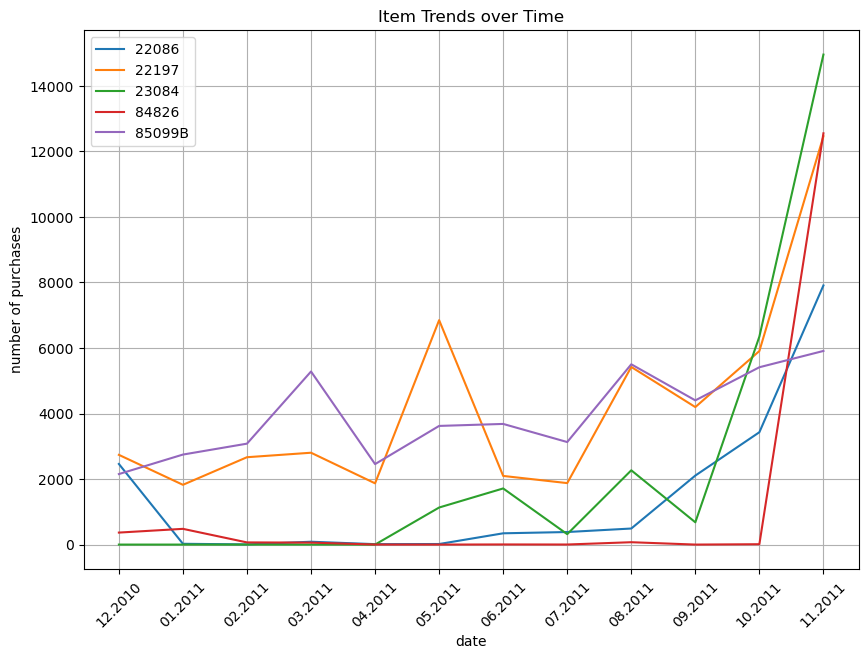

In [44]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_df.index], 
    rotation=45
)

plt.show()

Let's take a closer look at this time series plot. The sales of these five
products spiked in November 2011, especially, the sales of the product with
the stock code, 85099B, which were close to 0 from February 2011 to
October 2011. Then, it suddenly spiked in November 2011. It might be worth
taking a closer look into what might have driven this spike. It could be an item
that is highly sensitive to seasonality, such that this item becomes very popular
during November, or it could also be due to a genuine change in trends that
led this item to become suddenly more popular than before.
The popularity of the rest of the top five products, 22086, 22197, 23084, and
84826, seem to have built up in the few months prior to November 2011. As a
marketer, it would be worthwhile taking a closer look at the potential drivers
behind this buildup of rising popularity for these items. You could look at
whether these items are typically more popular in colder seasons or whether
there is a rising trend for these specific items in the market.
Analyzing the trends and changes in the popularity of products not only helps
you understand what your customers like and purchase the most, but also helps
you tailor your marketing messages. For example, you can recommend these
items with rising popularity in your marketing emails, calls, or advertisements
to improve customer engagement. As it has been shown that your customers
are more interested and more likely to purchase these items, you might get
higher marketing engagement from your customers when you market these
items more and you might eventually get higher conversion rates when you
target your customers with these trending items. Using these popular and
trending items is one way to build a product recommendation engine, which
we are going to expand on and experiment with thoroughly in the next chapter.


##  How to build and Evaluate Regression Models Using Machine Learning Algorithms in Python